<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment





## **TASK 1**: **Becoming familiar with the dataset**




## Data Description

| Variable    | Description                                                                                                                                          |
|------------ | -----------------------------------------------------------------------------------------------------------------------------------------------------|
| CRIM        | per capita crime rate by town                                                                                                                        |
| ZN          | proportion of residental land zoned for lots over 25,000 sq. ft.                                                                                     |
| INDUS       | proportion of non-retail business acres per town                                                                                                     |
| CHAS        | Charles River dummy variable (1 if tract bounds river; 0 otherwise)                                                                                  |
| NOX         | nitric oxides concentration (parts per 10 million)                                                                                                   |
| RM          | average number of rooms per dwelling                                                                                                                 |
| AGE         | proportion of owner occupied units built prior to 1940                                                                                               |
| DIS         | weighted distances to five Boston employment center                                                                                                  |
| RAD         | index of accessability to redial highways                                                                                                            |
| TAX         | full value property tax rate per $10,0000                                                                                                            |
| PTRATIO     | pupil-teacher ratio by town                                                                                                                          |
| LSTAT       | % lower status of the population                                                                                                                     |
| MEDV        | Median value of owner occupied homes in the thousands of dollars                                                                                     |


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64




## **TASK 2**: **Generating Descriptive Statistics and Visualizations**


## **Boxplot: Median value of owner-occupied homes**

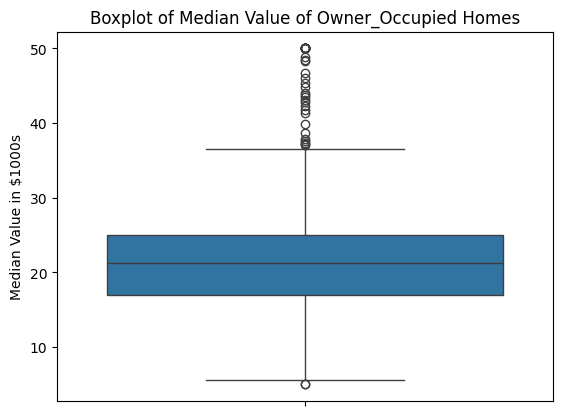

In [8]:
ax = sns.boxplot(y='MEDV', data = boston_df) 
pyplot.title("Boxplot of Median Value of Owner_Occupied Homes")
pyplot.ylabel("Median Value in $1000s")
pyplot.rcParams["figure.figsize"] = [5.0, 2.0]
pyplot.rcParams["figure.autolayout"] = True
pyplot.show()

## **Bar plot for the Charles river variable**

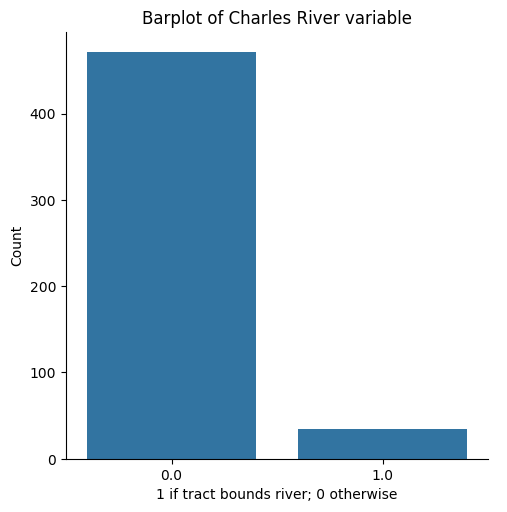

In [22]:
ax = sns.catplot(x="CHAS", kind="count", data = boston_df)
pyplot.title("Barplot of Charles River variable")
pyplot.xlabel("1 if tract bounds river; 0 otherwise")
pyplot.ylabel("Count")
pyplot.show()

## **Boxplot for the MEDV variable vs the AGE variable**

In [10]:
AGE_categories = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

# Categorizing AGE variable into three divisions
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_division'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_division'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_division'] = '70 years and older'

# Converting 'AGE_division' column to categorical with specified categories
boston_df['AGE_division'] = pd.Categorical(boston_df['AGE_division'], categories = AGE_categories)

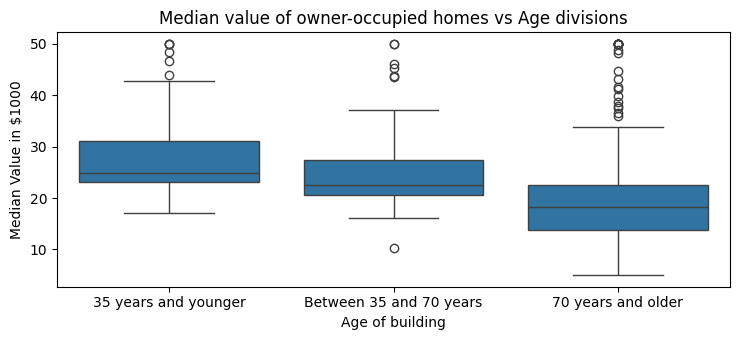

In [21]:
ax = sns.boxplot (x = 'AGE_division', y='MEDV', data=boston_df)
pyplot.title ('Median value of owner-occupied homes vs Age divisions')
pyplot.xlabel ('Age of building')
pyplot.ylabel ('Median Value in $1000')
pyplot.rcParams["figure.figsize"] = [12, 3.50]
pyplot.rcParams["figure.autolayout"] = True
pyplot.show()

## **Scatter plot to show the relationship between INDUS and NOX**

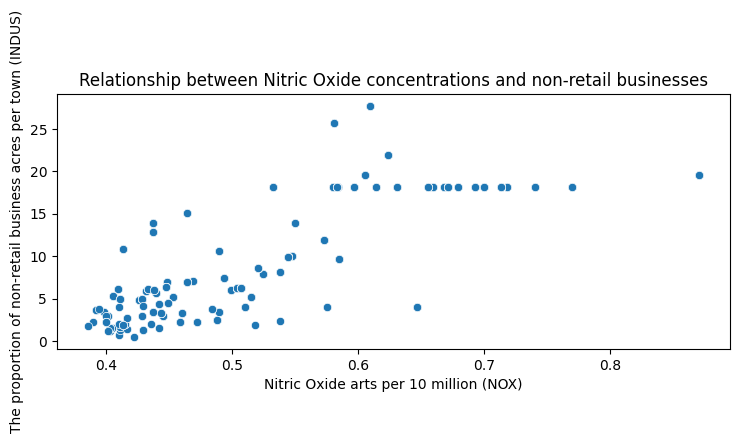

In [26]:
ax = sns.scatterplot (x='NOX', y='INDUS', data=boston_df)
pyplot.title ('Relationship between Nitric Oxide concentrations and non-retail businesses')
pyplot.xlabel ('Nitric Oxide arts per 10 million (NOX)')
pyplot.ylabel ('The proportion of non-retail business acres per town (INDUS)')
pyplot.rcParams["figure.figsize"] = [10.0, 3.50]
pyplot.rcParams["figure.autolayout"] = True
pyplot.show()

**when the proportion of non-retail business is low the amount of Nitric Oxid is relatively low**

## **Histogram for the pupil to teacher ratio variable**

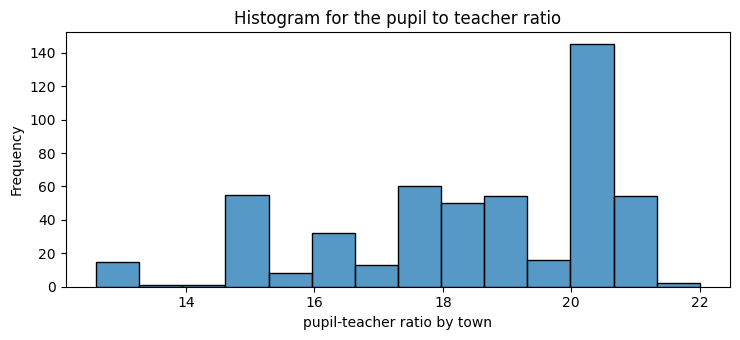

In [13]:
ax = sns.histplot(boston_df['PTRATIO'], kde=False)
pyplot.title("Histogram for the pupil to teacher ratio")
pyplot.xlabel ('pupil-teacher ratio by town')
pyplot.ylabel ('Frequency')
pyplot.show()

**In 140 out of 506 cases there are around 21 pupils per one teacher which is the most dominant proportion. Also, there is no case in which the ratio of pupil to teacher is more than 22**

## **TASK 3**:  **Using the appropriate tests to answer the questions provided**


## T-test: Is there a significant difference in median value of houses bounded by the Charles river or not? 

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river ")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river ")

In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Result: since the p-value is less than 0.05, the variance are not equal.

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** 
Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

## ANOVA: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

Categories for the AGE are (three populations):
* 35 years and younger
* Between 35 and 70 years
* 70 years and older

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [16]:
scipy.stats.levene(boston_df[boston_df['AGE_division'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_division'] == 'Between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_division'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Result: since the p-value is greater than 0.05, we can assume equality of variance

In [17]:
thirtyfive_lower = boston_df[boston_df['AGE_division'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_division'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_division'] == '70 years and older']['MEDV']

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, the null hypothesiswe will be rejected  as there is significant evidence that at least one of the means differ. Thus, the Median values of houses differ by age. 

## Pearson Correlation: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

*   $H\_0:$ there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## Regression Analysis: What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?


*   $H\_0:$ there is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? 
*   $H\_1:$ there is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? 

In [20]:

X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        19:22:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p-value < 0.05 so we reject the null hypothesis and conclude that there is evidence of correlation between DIS and MEDV. However, the impact of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV) is not robust because of the R-squared amount.
